In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
from xhistogram.xarray import histogram as xh
%reload_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [2]:
rootdir = '/local/ss23/NEW_MI'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
z0_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
z0_avg = z0_all.mean(dim='ensemble')

In [3]:
rootdir = '/local/ss23/NEW_MI'
filename = 'MI_k01_ens*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
z0_allLo = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
z0_avgLo = z0_allLo.mean(dim='ensemble')

In [4]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
z0_allO = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
z0_avgO = z0_allO.sel(ensemble=30)
z0_avgO = z0_avgO/2
z0_allO = z0_allO.sel(ensemble=slice(0,30))

In [5]:
z0Avg = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ens130_1x1_1950_2100.nc')
z0AvgLo = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_k01_ens130_1x1_1950_2100.nc')

# Spatial Maps

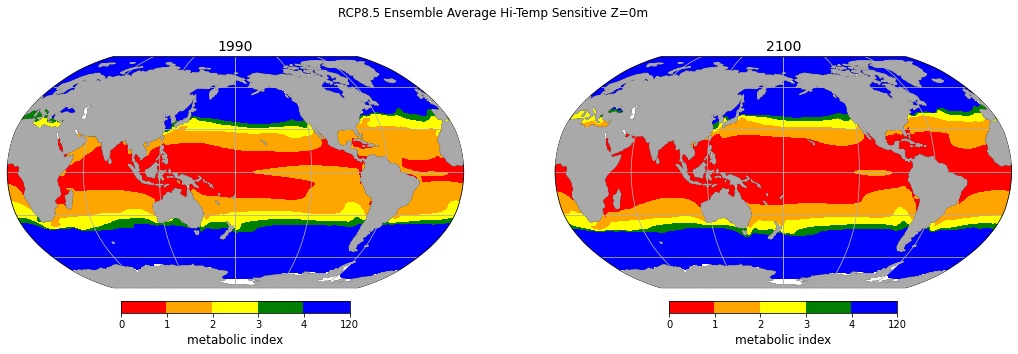

In [7]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Hi-Temp Sensitive Z=0m')
wn.filterwarnings('ignore')
func.graph(z0Avg, ax0, '1990', 1990, None, False)
func.graph(z0Avg, ax1, '2100', 2100, None, False)

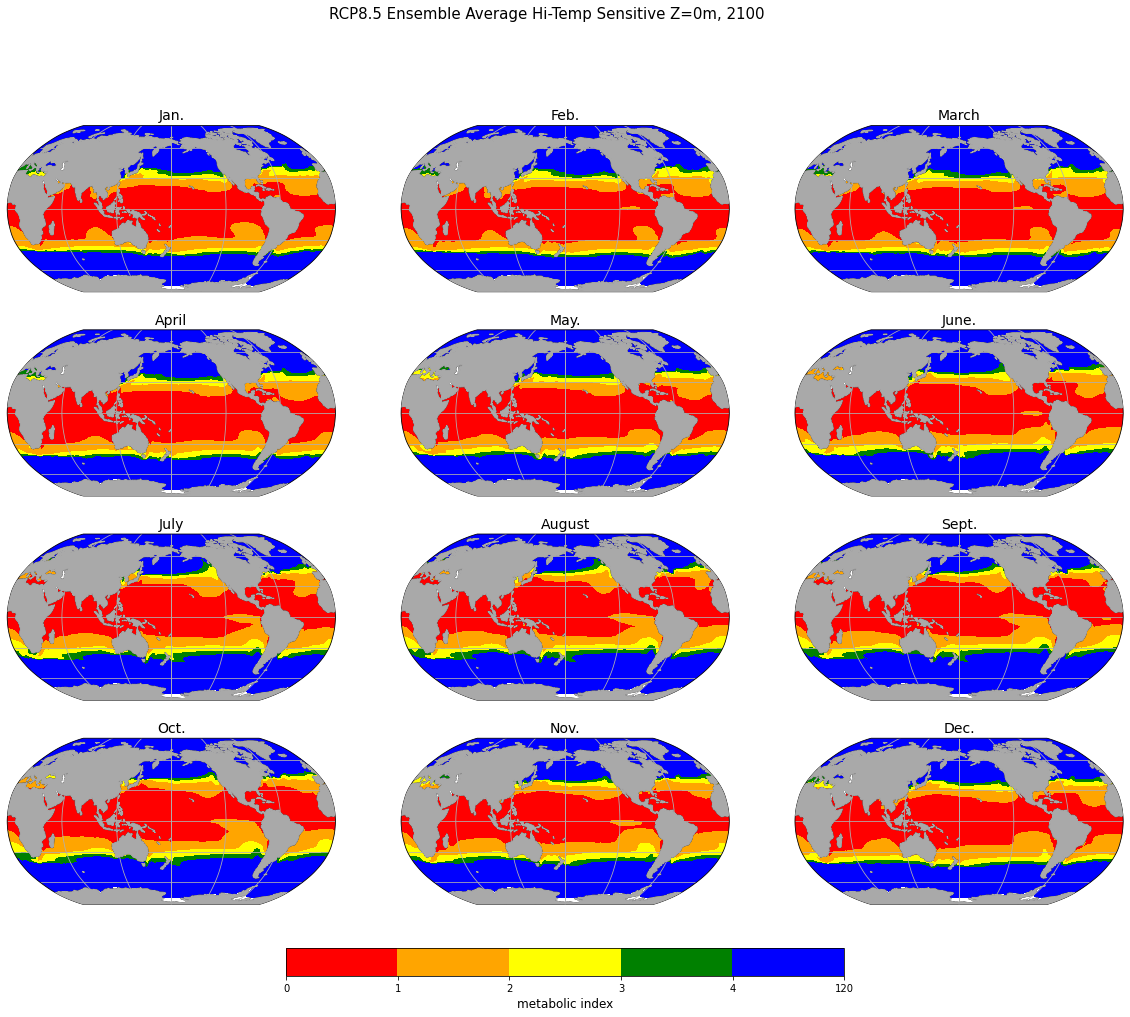

In [69]:
func.months_of_year(z0Avg,'2100','RCP8.5 Ensemble Average Hi-Temp Sensitive Z=0m, 2100')

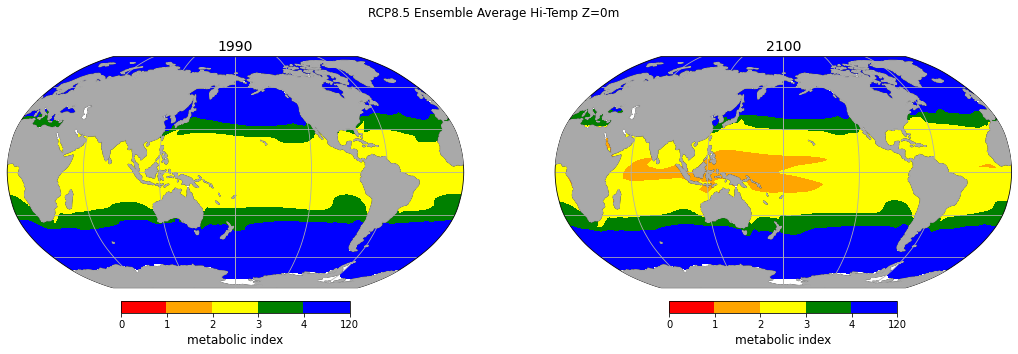

In [79]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Hi-Temp Z=0m')
wn.filterwarnings('ignore')
func.graph(z0AvgLo, ax0, '1990', 1990, None, False)
func.graph(z0AvgLo, ax1, '2100', 2100, None, False)

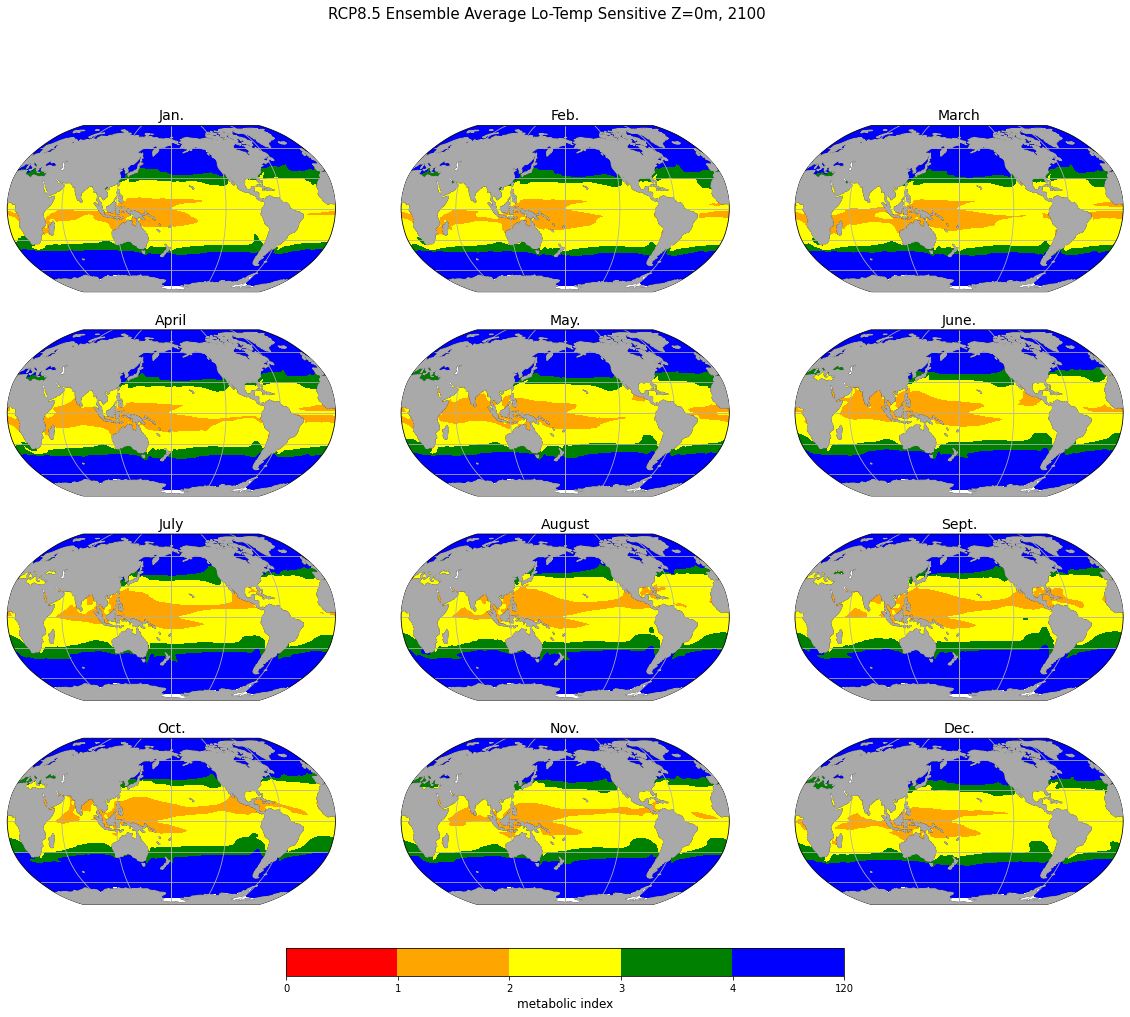

In [31]:
func.months_of_year(z0AvgLo,'2100','RCP8.5 Ensemble Average Lo-Temp Sensitive Z=0m, 2100')

# Habitable Region

In [6]:
hab = ~np.isnan(z0_all.where(z0_all['MI']>2.0))
habSum = hab['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
habSum = habSum.sel(time=slice('1990-01-01','2100-12-31'))
habSum = habSum.groupby('time.year').mean()
habDec = (habSum/habSum.sel(year=1990))*100
habDecEns = habDec.mean(dim='ensemble')

In [73]:
habO = ~np.isnan(z0_allO.where(z0_allO['MI']>1.0))
habSumO = habO['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
habSumO = habSumO.sel(time=slice('1990-01-01','2100-12-31'))
habSumO = habSumO.groupby('time.year').mean()
habDecO = (habSumO/habSumO.sel(year=1990))*100
habDecO = habDecO.mean(dim='ensemble')

In [13]:
habLo = ~np.isnan(z0_allLo.where(z0_allLo['MI']>4.0))
habSumLo = habLo['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
habSumLo = habSumLo.sel(time=slice('1990-01-01','2100-12-31'))
habSumLo = habSumLo.groupby('time.year').mean()
habDecLo = (habSumLo/habSumLo.sel(year=1990))*100
habDecLoEns = habDecLo.mean(dim='ensemble')

In [10]:
gloLo = ~np.isnan(z0_allLo.where(z0_allLo['MI']>4.0))
gloSumLo = gloLo['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
gloSumLo = gloSumLo.sel(time=slice('1990-01-01','2100-12-31'))
gloSumLo = gloSumLo.groupby('time.year').mean()
gloDecLo = (gloSumLo/total)*100
gloDecLo = gloDecLo.mean(dim='ensemble')

In [11]:
glo = ~np.isnan(z0_all.where(z0_all['MI']>2.0))
gloSum = glo['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
gloSum = gloSum.sel(time=slice('1990-01-01','2100-12-31'))
gloSum = gloSum.groupby('time.year').mean()
gloDec = (gloSum/43210)*100
gloDec = gloDec.mean(dim='ensemble')

Text(0.5, 0, 'Year')

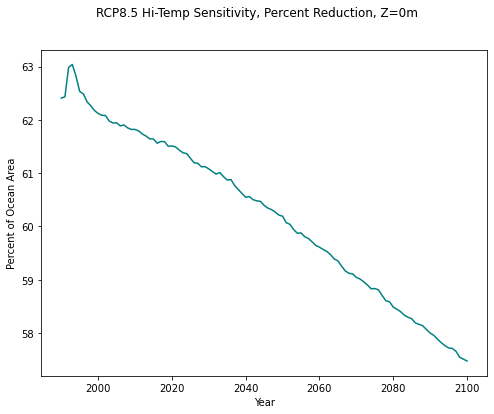

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Hi-Temp Sensitivity, Percent Reduction, Z=0m')
ax.plot(np.unique(gloDec['year']),gloDec,color='teal')
ax.set_ylabel('Percent of Ocean Area')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

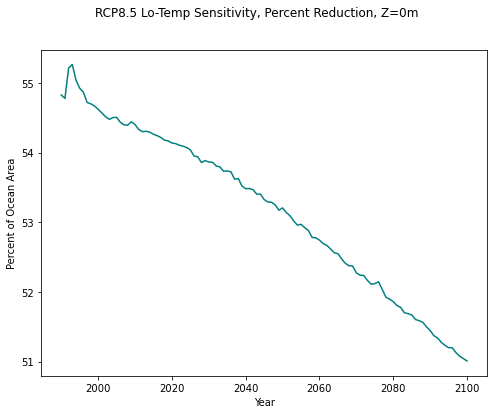

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Lo-Temp Sensitivity, Percent Reduction, Z=0m')
ax.plot(np.unique(gloDecLo['year']),gloDecLo,color='teal')
ax.set_ylabel('Percent of Ocean Area')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

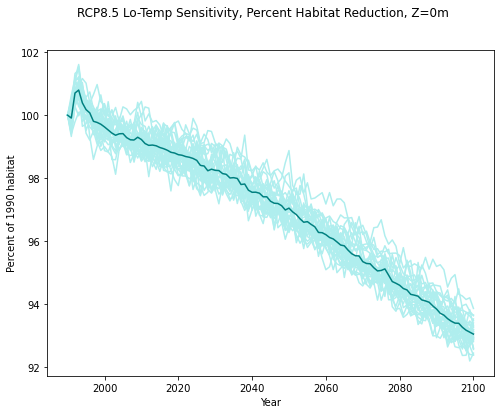

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Lo-Temp Sensitivity, Percent Habitat Reduction, Z=0m')
wn.filterwarnings('ignore')
for ens in range(30):
    ax.plot(np.unique(habDecLo.sel(ensemble=ens)['year']),habDecLo.sel(ensemble=ens),color='paleturquoise')
ax.plot(np.unique(habDecLoEns['year']),habDecLoEns,color='teal')
ax.set_ylabel('Percent of 1990 habitat')
ax.set_xlabel('Year')

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Hi-Temp Sensitivity, Percent Habitat Reduction, Z=0m')
ax.plot(np.unique(habDec['year']),habDec,color='teal')
ax.set_ylabel('Percent of 1990 habitat')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

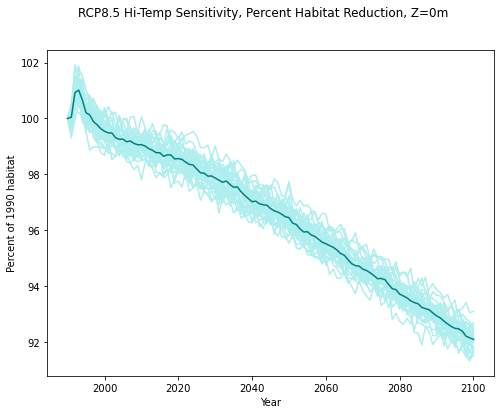

In [84]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Hi-Temp Sensitivity, Percent Habitat Reduction, Z=0m')
for ens in range(30):
    ax.plot(np.unique(habDec.sel(ensemble=ens)['year']),habDec.sel(ensemble=ens),color='paleturquoise')
ax.plot(np.unique(habDecEns['year']),habDecEns,color='teal')
ax.set_ylabel('Percent of 1990 habitat')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

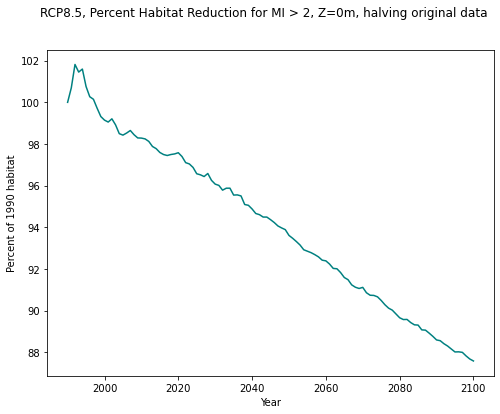

In [72]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5, Percent Habitat Reduction for MI > 2, Z=0m, halving original data')
ax.plot(np.unique(habDecO['year']),habDecO,color='teal')
ax.set_ylabel('Percent of 1990 habitat')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

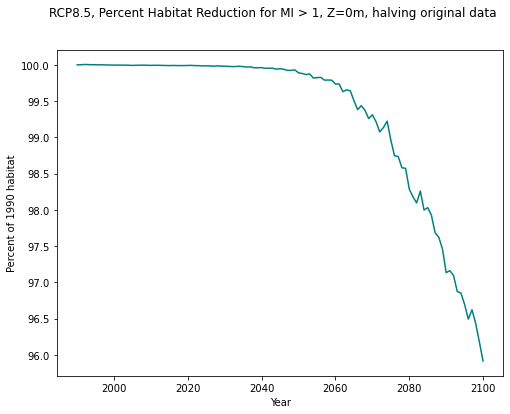

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5, Percent Habitat Reduction for MI > 1, Z=0m, halving original data')
ax.plot(np.unique(habDecO['year']),habDecO,color='teal')
ax.set_ylabel('Percent of 1990 habitat')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

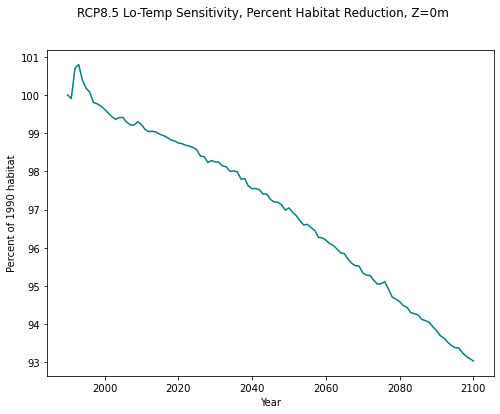

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Lo-Temp Sensitivity, Percent Habitat Reduction, Z=0m')
ax.plot(np.unique(habDecLo['year']),habDecLo,color='teal')
ax.set_ylabel('Percent of 1990 habitat')
ax.set_xlabel('Year')

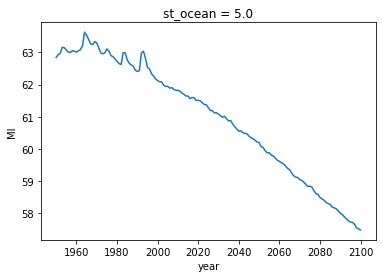

In [29]:
hab = ~np.isnan(z0_all.where(z0_all['MI']>2.0))
habSum = hab['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
habPerc = (habSum/43210)*100
habAvg = habPerc.mean(dim='ensemble')
habYear = habAvg.groupby('time.year').mean()
habYear.plot()

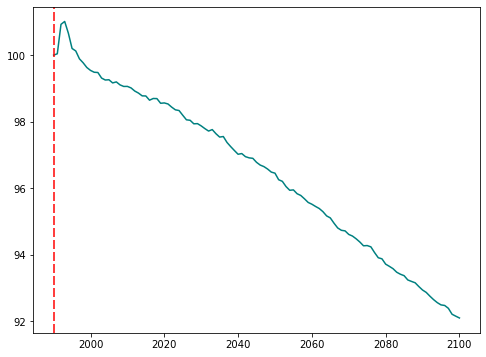

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.unique(habDec['year']),habDec,color='teal')
ax.set_ylim('Percent of 1990 habitat')
ax.set_xlim('Year')

# Monthly Thresholds

In [15]:
def ds_month(ds, thresh):
    mi = ds.sel(time=slice('1990-01-01','2100-12-31')).squeeze()
    mi_thresh = ~np.isnan(mi.where(mi['MI']>thresh))
    mi_month = mi_thresh.groupby('time.year').sum(dim='time')
    mi_mean = mi_month.mean(dim='ensemble')
    return mi_mean

In [70]:
z0_red = ds_month(z0_all, 1.0)
z0_or = ds_month(z0_all, 2.0)
z0_yel = ds_month(z0_all, 3.0)
z0_gr = ds_month(z0_all, 4.0)

In [16]:
z0_redLo = ds_month(z0_allLo, 1.0)
z0_orLo = ds_month(z0_allLo, 2.0)
z0_yelLo = ds_month(z0_allLo, 3.0)
z0_grLo = ds_month(z0_allLo, 4.0)

In [17]:
def percent_month(ds, month):
    byMonth = ~np.isnan(ds.where(ds['MI']>=month))
    percent_sum = byMonth['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    percent = (percent_sum/percent_sum.sel(year=1990))*100
    return percent

In [72]:
z0or_1 = percent_month(z0_or, 1)
z0or_3 = percent_month(z0_or, 3)
z0or_6 = percent_month(z0_or, 6)
z0or_9 = percent_month(z0_or, 9)
z0or_12 = percent_month(z0_or, 12)

In [19]:
z0gr_1Lo = percent_month(z0_grLo, 1)
z0gr_3Lo = percent_month(z0_grLo, 3)
z0gr_6Lo = percent_month(z0_grLo, 6)
z0gr_9Lo = percent_month(z0_grLo, 9)
z0gr_12Lo = percent_month(z0_grLo, 12)

Text(0.5, 1.0, 'MI < 2')

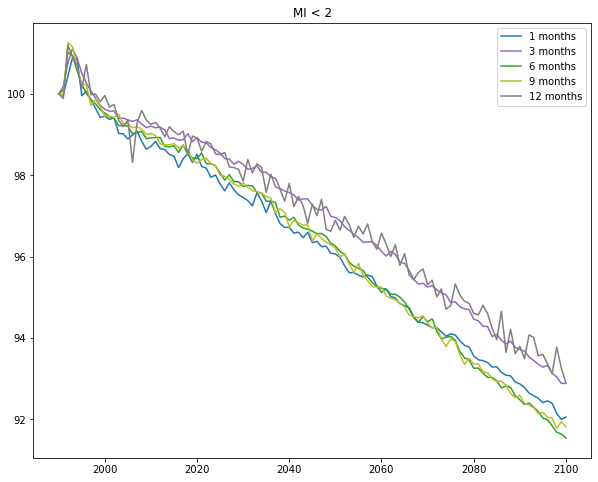

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Hi-Temp Sensitivity Percent of 1990 Habitat, Z=0m')
ax.plot(np.unique(z0or_1['year']),z0or_1,color='tab:blue',label='1 months')
ax.plot(np.unique(z0or_3['year']),z0or_3,color='tab:purple',label='3 months')
ax.plot(np.unique(z0or_6['year']),z0or_6,color='tab:green',label='6 months')
ax.plot(np.unique(z0or_9['year']),z0or_9,color='tab:olive',label='9 months')
ax.plot(np.unique(z0or_12['year']),z0or_12,color='tab:gray',label='12 months')
ax.legend(title='months below threshold')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of 1990 habitat')

Text(0, 0.5, 'Percent of 1990 habitat')

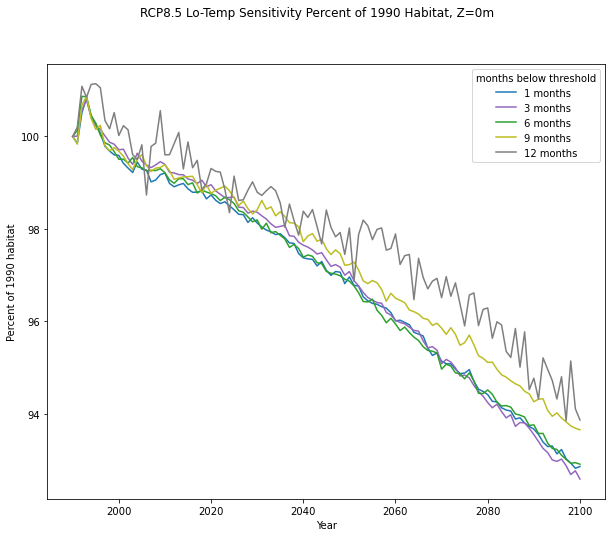

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Lo-Temp Sensitivity Percent of 1990 Habitat, Z=0m')
ax.plot(np.unique(z0gr_1Lo['year']),z0gr_1Lo,color='tab:blue',label='1 months')
ax.plot(np.unique(z0gr_3Lo['year']),z0gr_3Lo,color='tab:purple',label='3 months')
ax.plot(np.unique(z0gr_6Lo['year']),z0gr_6Lo,color='tab:green',label='6 months')
ax.plot(np.unique(z0gr_9Lo['year']),z0gr_9Lo,color='tab:olive',label='9 months')
ax.plot(np.unique(z0gr_12Lo['year']),z0gr_12Lo,color='tab:gray',label='12 months')
ax.legend(title='months below threshold')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of 1990 habitat')

# Seasonal Variation

In [9]:
total = 43210
totalS = 22744
totalN = 20466

In [23]:
redS = func.find_p(z0_all.sel(yt_ocean=slice(-89.5,0)), 1.0, totalS)
redN = func.find_p(z0_all.sel(yt_ocean=slice(0,89.5)), 1.0, totalN)
orS = func.find_p(z0_all.sel(yt_ocean=slice(-89.5,0)), 2.0, totalS)
orN = func.find_p(z0_all.sel(yt_ocean=slice(0,89.5)), 2.0, totalN)
yelS = func.find_p(z0_all.sel(yt_ocean=slice(-89.5,0)), 3.0, totalS)
yelN = func.find_p(z0_all.sel(yt_ocean=slice(0,89.5)), 3.0, totalN)
grS = func.find_p(z0_all.sel(yt_ocean=slice(-89.5,0)), 4.0, totalS)
grN = func.find_p(z0_all.sel(yt_ocean=slice(0,89.5)), 4.0, totalN)

In [29]:
redSLo = func.find_p(z0_allLo.sel(yt_ocean=slice(-89.5,0)), 1.0, totalS)
redNLo = func.find_p(z0_allLo.sel(yt_ocean=slice(0,89.5)), 1.0, totalN)
orSLo = func.find_p(z0_allLo.sel(yt_ocean=slice(-89.5,0)), 2.0, totalS)
orNLo = func.find_p(z0_allLo.sel(yt_ocean=slice(0,89.5)), 2.0, totalN)
yelSLo = func.find_p(z0_allLo.sel(yt_ocean=slice(-89.5,0)), 3.0, totalS)
yelNLo = func.find_p(z0_allLo.sel(yt_ocean=slice(0,89.5)), 3.0, totalN)
grSLo = func.find_p(z0_allLo.sel(yt_ocean=slice(-89.5,0)), 4.0, totalS)
grNLo = func.find_p(z0_allLo.sel(yt_ocean=slice(0,89.5)), 4.0, totalN)

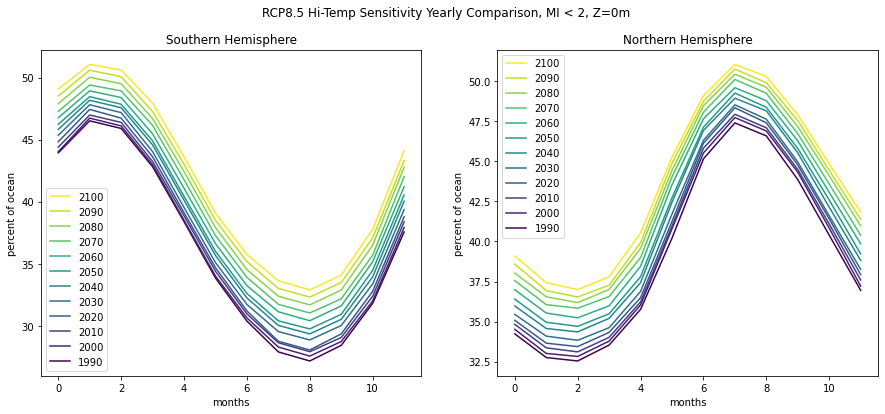

In [28]:
fig, (ax0,ax1) = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
fig.suptitle('RCP8.5 Hi-Temp Sensitivity Yearly Comparison, MI < 2, Z=0m')
func.percent(orS, ax0, 'Southern Hemisphere')
func.percent(orN, ax1, 'Northern Hemisphere')

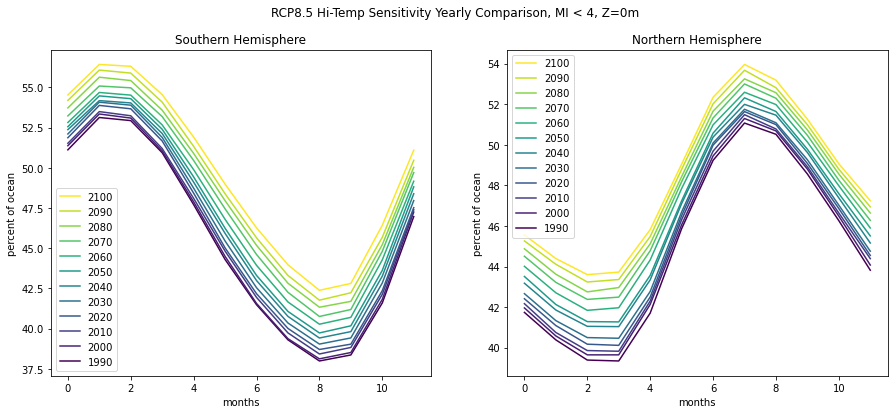

In [30]:
fig, (ax0,ax1) = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
fig.suptitle('RCP8.5 Hi-Temp Sensitivity Yearly Comparison, MI < 4, Z=0m')
func.percent(grSLo, ax0, 'Southern Hemisphere')
func.percent(grNLo, ax1, 'Northern Hemisphere')

In [32]:
# Load the area data
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':z0_avg['xt_ocean'],'yt_ocean':z0_avg['yt_ocean']})

(0.5, 1.7)

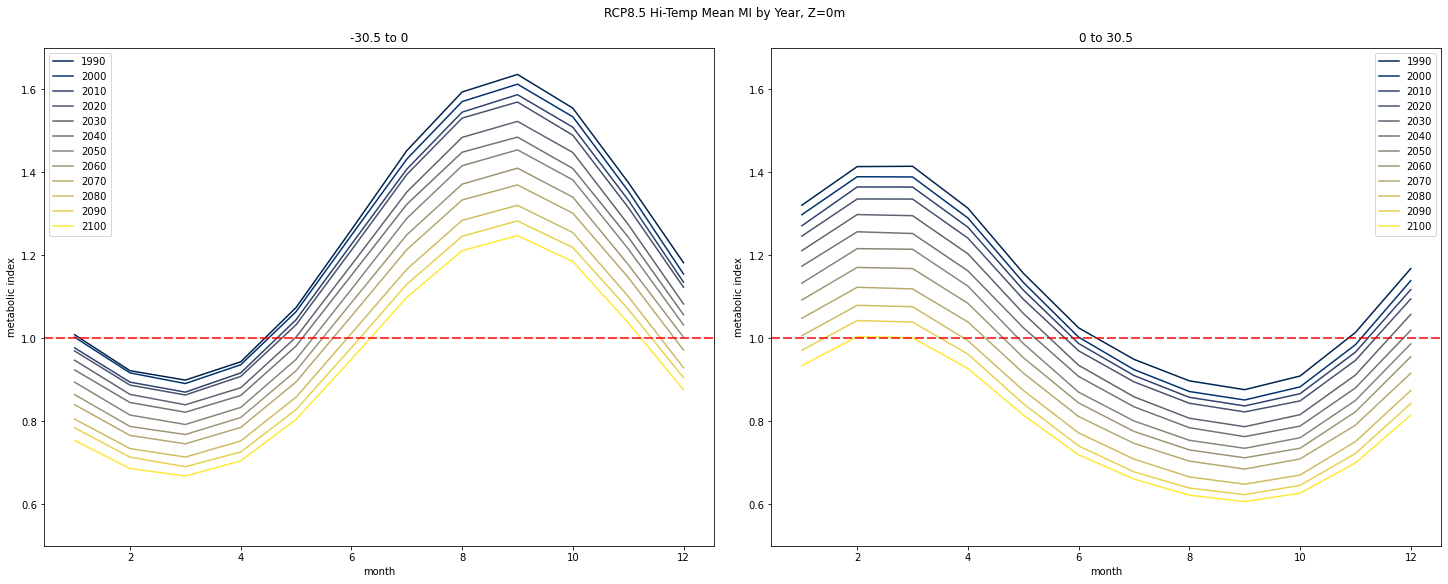

In [57]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Hi-Temp Mean MI by Year, Z=0m')
func.year_comp(area, z0Avg, ax0, [None, None, -30.5, 0], True, True, True, 'z0')
ax0.set_ylim(0.5,1.7)
func.year_comp(area, z0Avg, ax1, [None, None, 0, 30.5], True, True, True, 'z0')
ax1.set_ylim(0.5,1.7)

(0.8, 3.3)

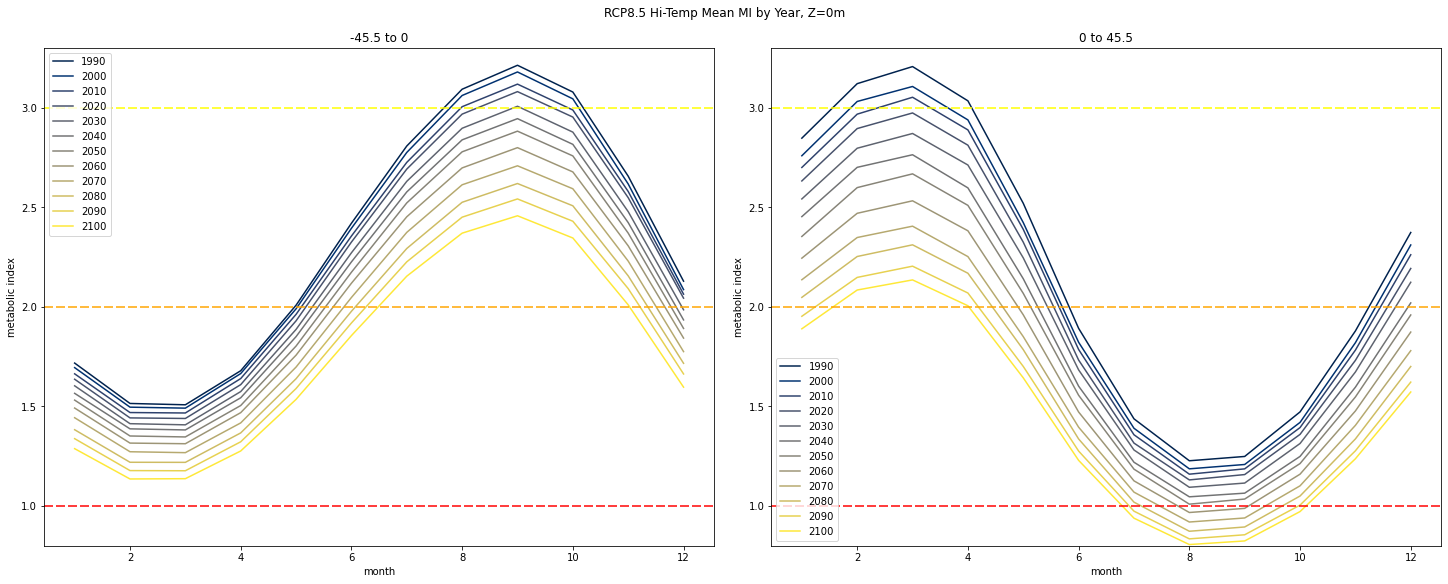

In [59]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Hi-Temp Mean MI by Year, Z=0m')
func.year_comp(area, z0Avg, ax0, [None, None, -45.5, 0], True, True, True, 'z0')
ax0.set_ylim(0.8,3.3)
func.year_comp(area, z0Avg, ax1, [None, None, 0, 45.5], True, True, True, 'z0')
ax1.set_ylim(0.8,3.3)

(3.5, 11.0)

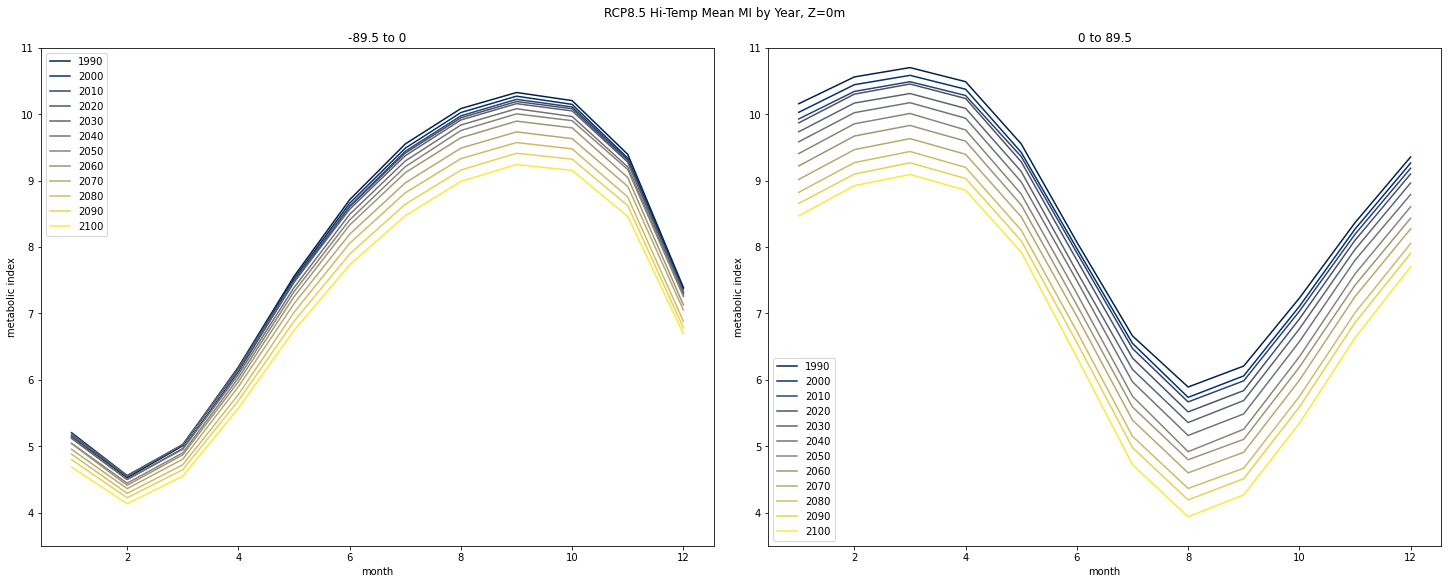

In [61]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Hi-Temp Mean MI by Year, Z=0m')
func.year_comp(area, z0Avg, ax0, [None, None, -89.5, 0], False, False, False, 'z0')
ax0.set_ylim(3.5,11)
func.year_comp(area, z0Avg, ax1, [None, None, 0, 89.5], False, False, False, 'z0')
ax1.set_ylim(3.5,11)

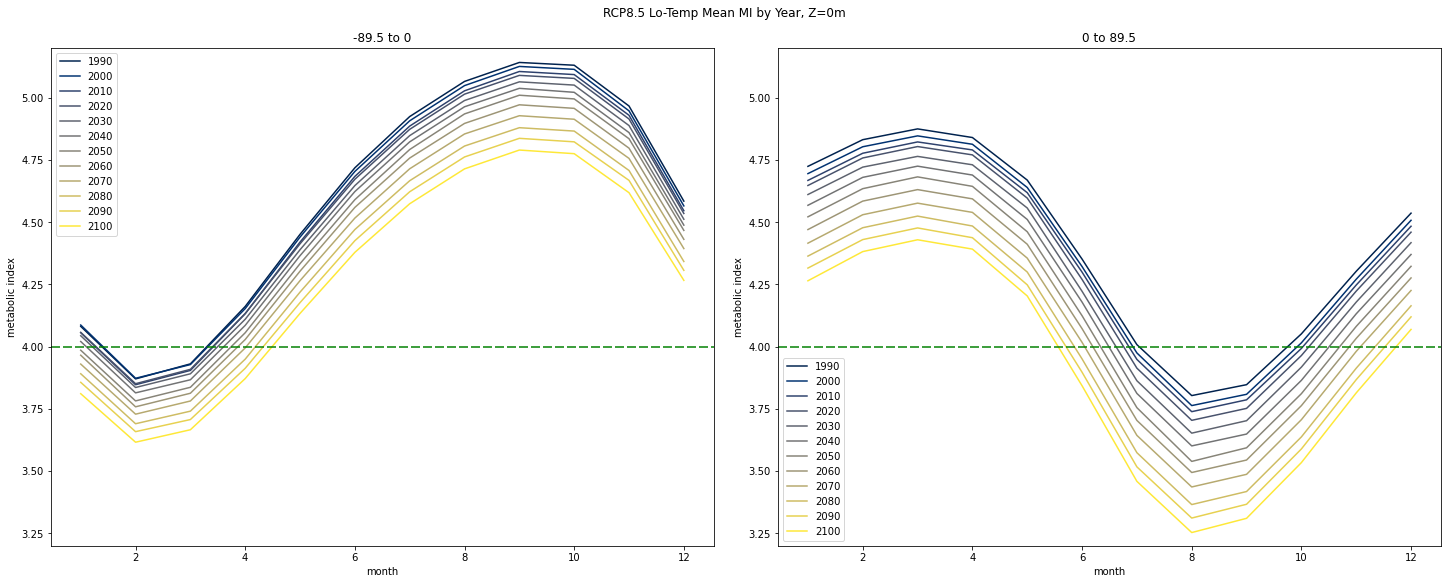

In [64]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Lo-Temp Mean MI by Year, Z=0m')
func.year_comp(area, z0AvgLo, ax0, [None, None, -89.5, 0], False, False, True, 'z0')
ax0.set_ylim(3.2,5.2)
ax0.axhline(y=4.0, xmin=0,xmax=1,color='green',dashes=[6,2])
func.year_comp(area, z0AvgLo, ax1, [None, None, 0, 89.5], False, False, True, 'z0')
ax1.set_ylim(3.2,5.2)
ax1.axhline(y=4.0, xmin=0,xmax=1,color='green',dashes=[6,2])

# Histograms

In [48]:
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':z0_avg['xt_ocean'],'yt_ocean':z0_avg['yt_ocean']})
oceanmask = np.isfinite(z0_avg['MI'].isel(time=0).squeeze())
area_masked = area.where(oceanmask,np.nan)
ds_total = ~np.isnan(area.where(oceanmask))
total = ds_total.sum(dim='yt_ocean').sum(dim='xt_ocean')
z0_area = xr.ones_like(z0_avg['MI'].isel(time=0))

In [50]:
mi_bins = np.arange(0,30,0.2)
dist = xh(z0Avg['MI'],bins=[mi_bins],dim=['xt_ocean','yt_ocean'],weights=z0_area)
distAll = xh(z0_all['MI'],bins=[mi_bins],dim=['xt_ocean','yt_ocean'],weights=area)
distYear = dist.groupby('time.year').mean()

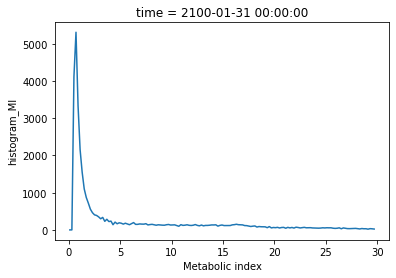

In [56]:
dist.sel(time='2100-01-31').plot()

# Time of Emergence

In [75]:
da_rcp85 = []
da_rcp85.append('placeholder')
for i in range(1,13):
    da_emerge = z0_or.year.where(z0_or>=i).min(dim='year')
    da_rcp85.append(da_emerge)

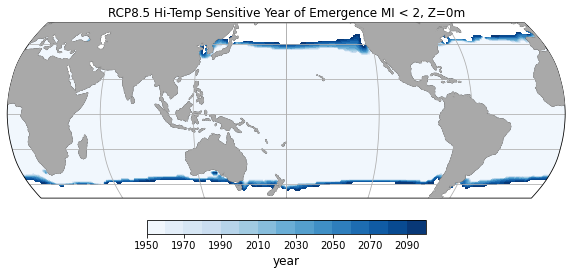

In [76]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
func.map_years(da_rcp85, ax, 1, 'RCP8.5 Hi-Temp Sensitive Year of Emergence MI < 2, Z=0m')

# Months below threshold

In [65]:
z0_red = func.ds_month(z0_all, 1.0)
z0_or = func.ds_month(z0_all, 2.0)
z0_yel = func.ds_month(z0_all, 3.0)
z0_gr = func.ds_month(z0_all, 4.0)

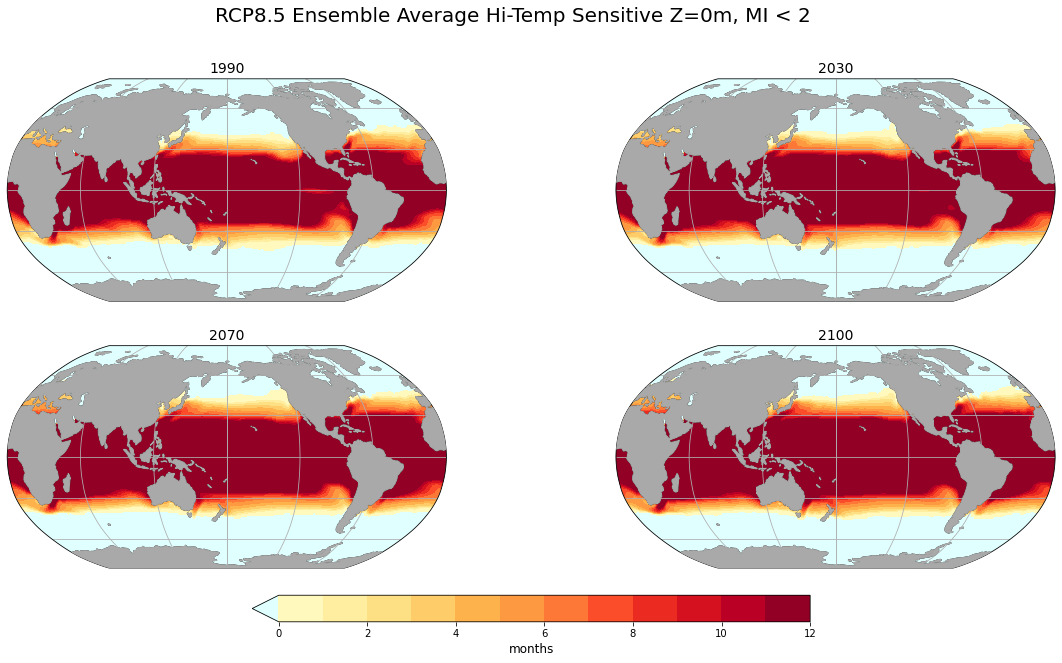

In [68]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Hi-Temp Sensitive Z=0m, MI < 2',fontsize=20)
func.map_months(axs[0,0], z0_or, 'YlOrRd', '1990', 1990)
func.map_months(axs[0,1], z0_or, 'YlOrRd', '2030', 2030)
func.map_months(axs[1,0], z0_or, 'YlOrRd', '2070', 2070)
im = func.map_months(axs[1,1], z0_or, 'YlOrRd', '2100', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

# Percent Ocean

In [21]:
def get_percent(ds, mi):
    ds_mi = ~np.isnan(ds.where(ds['MI']<mi))
    ds_miSum = ds_mi['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    ds_miPercent = (ds_miSum/total)*100
    ds_ens = ds_miPercent.mean(dim='ensemble')
    return ds_ens

In [22]:
z0_red = get_percent(z0_all, 1.0).sel(time=slice('1990-01-16','2100-12-16'))
z0_or = get_percent(z0_all, 2.0).sel(time=slice('1990-01-16','2100-12-16'))
z0_yel = get_percent(z0_all, 3.0).sel(time=slice('1990-01-16','2100-12-16'))
z0_gr = get_percent(z0_all, 4.0).sel(time=slice('1990-01-16','2100-12-16'))

z0_redLo = get_percent(z0_allLo, 1.0).sel(time=slice('1990-01-16','2100-12-16'))
z0_orLo = get_percent(z0_allLo, 2.0).sel(time=slice('1990-01-16','2100-12-16'))
z0_yelLo = get_percent(z0_allLo, 3.0).sel(time=slice('1990-01-16','2100-12-16'))
z0_grLo = get_percent(z0_allLo, 4.0).sel(time=slice('1990-01-16','2100-12-16'))

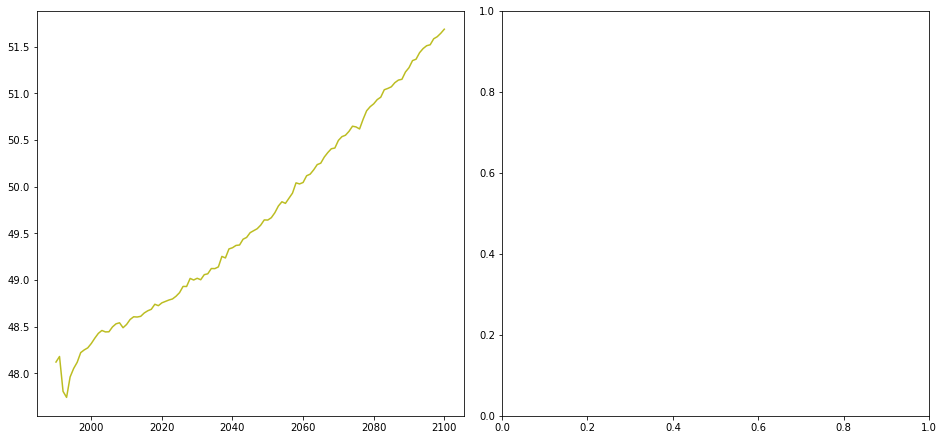

In [24]:
fig, (ax0,ax1) = plt.subplots(figsize=(13,6),ncols=2,constrained_layout=True)
ax0.plot(np.unique(z0_gr['time.year']),z0_gr.groupby('time.year').mean(),color='tab:olive',label='MI < 4')

Text(0.5, 0, 'Year')

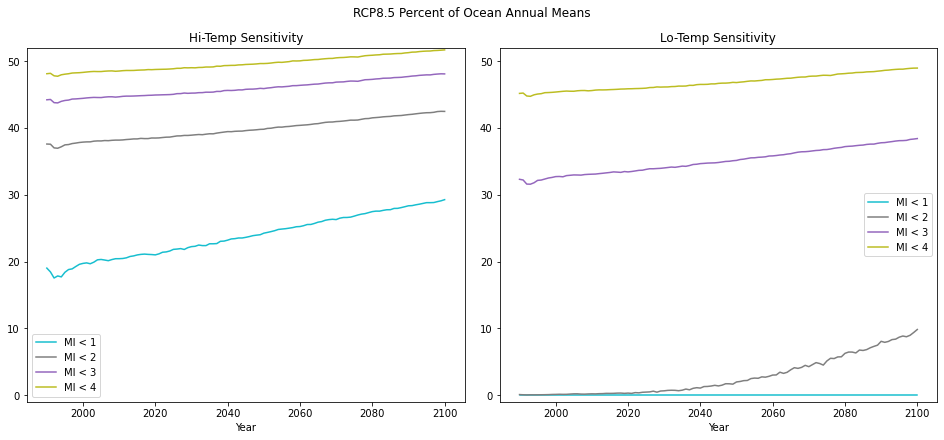

In [25]:
fig, (ax0,ax1) = plt.subplots(figsize=(13,6),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Percent of Ocean Annual Means')
wn.filterwarnings('ignore')

# func.plot_allEns(z0_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lightcyan')
# func.plot_allEns(z0_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'whitesmoke')
# func.plot_allEns(z0_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lavender')
ax0.plot(np.unique(z0_red['time.year']),z0_red.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax0.plot(np.unique(z0_or['time.year']),z0_or.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax0.plot(np.unique(z0_yel['time.year']),z0_yel.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
ax0.plot(np.unique(z0_gr['time.year']),z0_gr.groupby('time.year').mean(),color='tab:olive',label='MI < 4')
ax0.set_title('Hi-Temp Sensitivity')
ax0.legend()
ax0.set_ylim(-1,52)
ax0.set_xlabel('Year')

# func.percent_plot(ds_k11Avg, ax2, 'Depth k11', True, True, True, None, None, None,total)
# func.plot_allEns(k11_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'lightcyan')
# func.plot_allEns(k11_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'whitesmoke')
# func.plot_allEns(k11_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'lavender')
ax1.plot(np.unique(z0_redLo['time.year']),z0_redLo.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax1.plot(np.unique(z0_orLo['time.year']),z0_orLo.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax1.plot(np.unique(z0_yelLo['time.year']),z0_yelLo.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
ax1.plot(np.unique(z0_grLo['time.year']),z0_grLo.groupby('time.year').mean(),color='tab:olive',label='MI < 4')
ax1.set_title('Lo-Temp Sensitivity')
ax1.legend()
ax1.set_ylim(-1,52)
ax1.set_xlabel('Year')